In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.utils import fill_infos

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

np.random.seed(294697)

***
# Data import

In [2]:
chunk_size = 100000
sample_size_percent = 5

data = pd.DataFrame()

for chunk in pd.read_csv("./datas/en.openfoodfacts.org.products.csv", sep="\t", nrows=None, chunksize=chunk_size):
    actual_chunk_size = chunk.shape[0]
    random_size = int(actual_chunk_size * (sample_size_percent / 100))
    random_indexes = np.random.default_rng().choice(chunk.index, size=random_size, replace=False)
    chunk = chunk.loc[random_indexes]
    data = pd.concat([data, chunk])
    del chunk

data.shape

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,27,28,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,13,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,8,13,52,55,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_as

(95365, 186)

## Dataset overview

In [3]:
rows_nb, cols_nb = data.shape

In [4]:
data.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
44669,21500013109,http://world-en.openfoodfacts.org/product/0021...,org-database-usda,1587640472,2020-04-23T11:14:32Z,1587640472,2020-04-23T11:14:32Z,Adobo seasoning with pepper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Plant-based foods and beverages, Plant-based f...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States,"Salt, garlic, black pepper, tricalcium phospha...",NaN,NaN,NaN,NaN,NaN,0.25 tsp (1.2 g),1.2,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3.0,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...","McCormick & Company, Inc.",NaN,NaN,en:condiments,Condiments,NaN,NaN,NaN,NaN,NaN,N

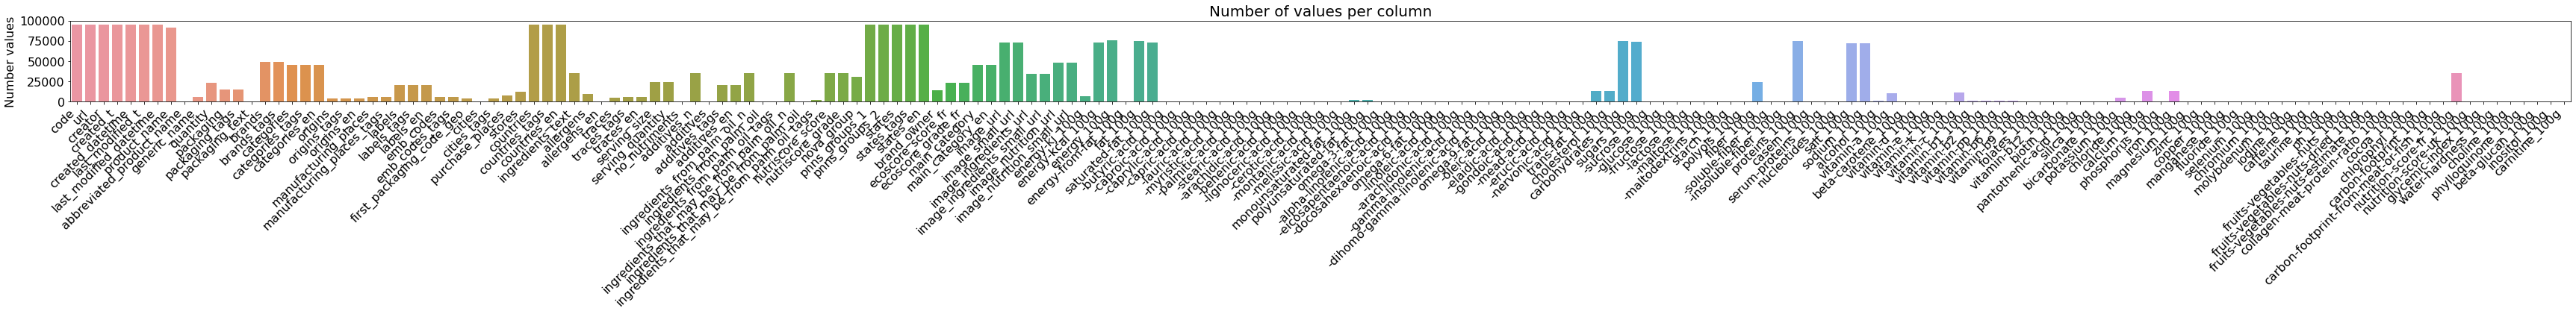

In [5]:
plt.figure(figsize=(60,2))

barplot = sns.barplot(x=data.columns, y=data.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
# Feature analysis

In [6]:
features = []

## General informations

In [7]:
general_infos = data.loc[:, "code":"quantity"]

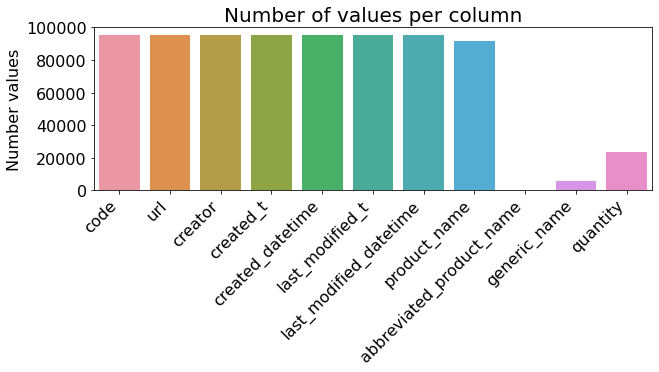

In [8]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos.columns, y=general_infos.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [9]:
general_infos.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity
44669,21500013109,http://world-en.openfoodfacts.org/product/0021...,org-database-usda,1587640472,2020-04-23T11:14:32Z,1587640472,2020-04-23T11:14:32Z,Adobo seasoning with pepper,NaN,NaN,NaN
7126,11110220455,http://world-en.openfoodfacts.org/product/0011...,inf,1627948368,2021-08-02T23:52:48Z,1627948409,2021-08-02T23:53:29Z,veggie dip,NaN,NaN,NaN
44905,21724603087,http://world-en.openfoodfacts.org/product/0021...,usda-ndb-import,1489078286,2017-03-09T16:51:26Z,1587589738,2020-04-22T21:08:58Z,"Vv Supremo, Queso Del Caribe, Queso Blanco Cheese",NaN,NaN,NaN
6473,11110050496,http://world-en.openfoodfacts.org/product/0011...,inf,1596665696,2020-08-05T22:14:56Z,1596665723,2020-08-05T22:15:23Z,NaN,NaN,NaN,NaN
40355,21130118762,http://world-en.openfoodfacts.org/product/0021...,usda-ndb-import,1489078164,2017-03-09T16:49:24Z,1489078164,2017-03-09T16:49:24Z,Glazed Donut Holes,NaN,NaN,NaN


In [10]:
general_infos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 44669 to 1903254
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   code                      95365 non-null  object
 1   url                       95365 non-null  object
 2   creator                   95365 non-null  object
 3   created_t                 95365 non-null  int64 
 4   created_datetime          95365 non-null  object
 5   last_modified_t           95365 non-null  int64 
 6   last_modified_datetime    95365 non-null  object
 7   product_name              91421 non-null  object
 8   abbreviated_product_name  349 non-null    object
 9   generic_name              6024 non-null   object
 10  quantity                  23801 non-null  object
dtypes: int64(2), object(9)
memory usage: 8.7+ MB


### Redundancy: product_name, abbreviated_product_name, generic_name

In [11]:
general_infos[general_infos.generic_name.notna()].product_name.isna().sum()

10

We can see that 'abbreviated_product_name' contains too fews entries to be usefull.  
Regarding the 'generic_name', the fill percentage is not very high, but worst, each time 'generic_name' is filled, so is 'product_name'.

#### Conclusion
Only 'product_name' feature is usefull

In [12]:
general_infos_features = [
    "code",
    "url",
    "creator",
    "created_t",
    "created_datetime",
    "last_modified_t",
    "last_modified_datetime",
    "product_name",
    "quantity"
]

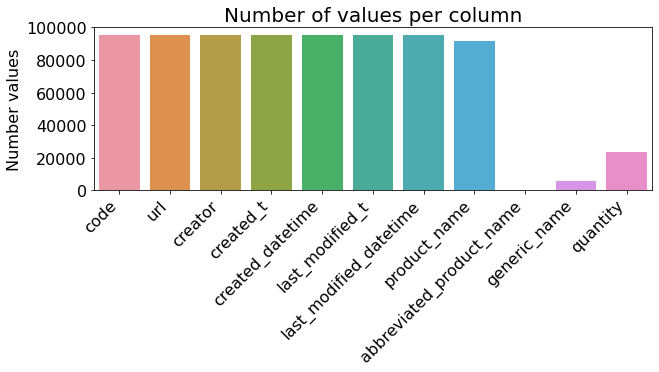

In [13]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos.columns, y=general_infos.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

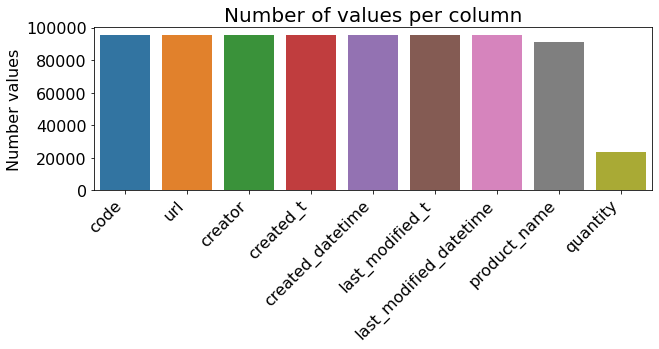

In [14]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos[general_infos_features].columns, y=general_infos[general_infos_features].apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

## Tags

In [15]:
tags = data.loc[:, "packaging":"countries_en"]

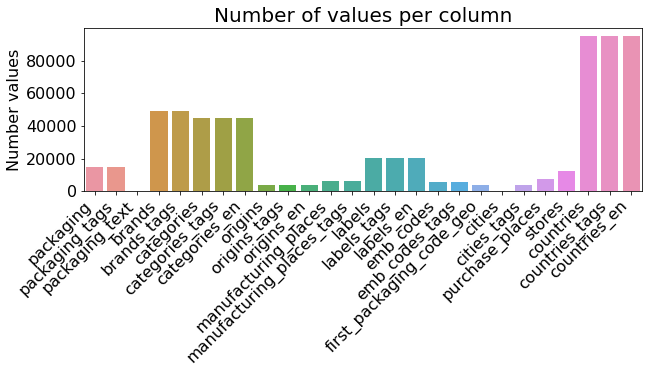

In [16]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=tags.columns, y=tags.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [17]:
tags.head()

,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en
44669,NaN,NaN,NaN,NaN,NaN,"Plant-based foods and beverages, Plant-based f...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
7126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:United States,en:united-states,United States
44905,NaN,NaN,NaN,V & V Supremo Foods Inc,v-v-supremo-foods-inc,"Dairies, Fermented foods, Fermented milk produ...","en:dairies,en:fermented-foods,en:fermented-mil...","Dairies,Fermented foods,Fermented milk product...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
6473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:United States,en:united-states,United States
40355,NaN,NaN,NaN,"Safeway Kitchens, Safeway Inc.","safeway-kitchens,safeway-inc",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States


In [18]:
tags.iloc[:, :13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 44669 to 1903254
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   packaging                  14999 non-null  object
 1   packaging_tags             14999 non-null  object
 2   packaging_text             270 non-null    object
 3   brands                     49264 non-null  object
 4   brands_tags                49263 non-null  object
 5   categories                 45062 non-null  object
 6   categories_tags            45061 non-null  object
 7   categories_en              45061 non-null  object
 8   origins                    4069 non-null   object
 9   origins_tags               4059 non-null   object
 10  origins_en                 4059 non-null   object
 11  manufacturing_places       6038 non-null   object
 12  manufacturing_places_tags  6035 non-null   object
dtypes: object(13)
memory usage: 10.2+ MB


In [19]:
tags.iloc[:, 13:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 44669 to 1903254
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    20459 non-null  object 
 1   labels_tags               20459 non-null  object 
 2   labels_en                 20459 non-null  object 
 3   emb_codes                 5824 non-null   object 
 4   emb_codes_tags            5823 non-null   object 
 5   first_packaging_code_geo  3599 non-null   object 
 6   cities                    0 non-null      float64
 7   cities_tags               3869 non-null   object 
 8   purchase_places           7736 non-null   object 
 9   stores                    12090 non-null  object 
 10  countries                 95117 non-null  object 
 11  countries_tags            95117 non-null  object 
 12  countries_en              95117 non-null  object 
dtypes: float64(1), object(12)
memory usage: 10.2+ MB


### Empty features

In [20]:
tags.packaging_text.notna().sum()

270

In [21]:
tags.cities.notna().sum()

0

#### Conclusion

We can consider the features "packaging_text" and "cities" are empty and so not usefull.

### Redundancy

packaging, packaging_tags

In [22]:
tags.loc[:, ["packaging", "packaging_tags"]].loc[tags.packaging.notna() & tags.packaging_tags.notna()].iloc[:20]

,packaging,packaging_tags
52194,packaging,packaging
85713,"cartón,caja","carton,caja"
19708,craft,craft
2453,"fr:verre,fr:bocal,Metal,Glass","fr-verre,fr-bocal,metal,glass"
38132,plastique,plastique
88449,"carton,plastique,boîte","carton,plastique,boite"
60254,Bag,bag
46724,Glass Jar,glass-jar
2978,Produkt,produkt
6406,en:card-box,en-card-box


In [23]:
tags[tags.packaging_tags.notna()].loc[:,["packaging"]].isna().sum()

packaging    0
dtype: int64

We can see that each time one of the features "packaging" or "packaging_tags" is filled, the other is also filled.
We will keep the feature "packaging" because it transport more information, plus, it's easier to get rid of the "en:", "fr:" than "en-", because in "packaging_tags" each separator is a "-" and not in "packaging".

brands, brands_tags

In [24]:
tags.iloc[:20].loc[:, ["brands", "brands_tags"]]

,brands,brands_tags
44669,NaN,NaN
7126,NaN,NaN
44905,V & V Supremo Foods Inc,v-v-supremo-foods-inc
6473,NaN,NaN
40355,"Safeway Kitchens, Safeway Inc.","safeway-kitchens,safeway-inc"
76136,NaN,NaN
37251,NaN,NaN
80680,@Ease,ease
1887,NaN,NaN
61056,NaN,NaN


In [25]:
tags[tags.brands_tags.notna()].loc[:,["brands"]].isna().sum()

brands    1
dtype: int64

The features "brands" and "brands_tags" are almost equally filled. We will keep "brands" because this feature carry most information (spaces, capital letters...)

categories, categories_tags, categories_en

In [26]:
tags.loc[:, ["categories", "categories_tags", "categories_en"]].iloc[:20]

,categories,categories_tags,categories_en
44669,"Plant-based foods and beverages, Plant-based f...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
7126,NaN,NaN,NaN
44905,"Dairies, Fermented foods, Fermented milk produ...","en:dairies,en:fermented-foods,en:fermented-mil...","Dairies,Fermented foods,Fermented milk product..."
6473,NaN,NaN,NaN
40355,NaN,NaN,NaN
76136,NaN,NaN,NaN
37251,"Desserts, Frozen foods, Frozen desserts","en:desserts,en:frozen-foods,en:frozen-desserts","Desserts,Frozen foods,Frozen desserts"
80680,Frozen foods,en:frozen-foods,Frozen foods
1887,NaN,NaN,NaN
61056,NaN,NaN,NaN


In [27]:
tags[tags.categories.notna()].loc[:,["categories_en"]].isna().sum()

categories_en    1
dtype: int64

In [28]:
tags[tags.categories_tags.notna()].loc[:,["categories_en"]].isna().sum()

categories_en    0
dtype: int64

We will keep "categories_en".

origins, origins_tags, origins_en

In [29]:
tags.loc[:, ["origins", "origins_tags", "origins_en"]].loc[tags.origins.notna() & tags.origins_tags.notna() & tags.origins_en.notna()].iloc[:20]

,origins,origins_tags,origins_en
85713,ESTADOS UNIDOS AMERICANOS,en:estados-unidos-americanos,Estados-unidos-americanos
19708,Brésil,en:bresil,Bresil
90482,EEUU,en:united-states,United States
83561,MEXICO,en:mexico,Mexico
22957,ESTADOS UNIDOS,en:estados-unidos,Estados-unidos
51421,British steal,en:british-steal,British-steal
3698,Italie,en:italy,Italy
51138,México,en:mexico,Mexico
60072,Canada,en:canada,Canada
24076,Unknown,en:unknown,Unknown


In [30]:
tags[tags.origins_tags.notna()].loc[:,["origins"]].isna().sum()

origins    0
dtype: int64

In [31]:
tags[tags.origins_en.notna()].loc[:,["origins"]].isna().sum()

origins    0
dtype: int64

We will keep the feature "origins"

manufacturing_places, manufacturing_places_tags

In [32]:
tags.loc[:, ["manufacturing_places", "manufacturing_places_tags"]].loc[tags.manufacturing_places.notna() & tags.manufacturing_places_tags.notna()].iloc[:20]

,manufacturing_places,manufacturing_places_tags
85713,ESTADOS UNIDOS AMERICANOS,estados-unidos-americanos
2453,United Kingdom,united-kingdom
88449,"Royaume-Uni,Écosse","royaume-uni,ecosse"
60254,USA,usa
36052,Uk,uk
26724,United Kingdom,united-kingdom
65423,"Green Bay, WI, USA","green-bay,wi,usa"
53421,"Hofheim-Wallau,Deutschland","hofheim-wallau,deutschland"
431,Etats-unis,etats-unis
90482,oregon,oregon


We will keep the feature "manufacturing_places"

labels, labels_tags, labels_en

In [33]:
tags.loc[:, ["labels", "labels_tags", "labels_en"]].loc[tags.labels.notna() & tags.labels_en.notna() & tags.labels_en.notna()].iloc[:20]

,labels,labels_tags,labels_en
52194,en:usda-organic,"en:organic,en:usda-organic","Organic,USDA Organic"
48784,Organic,en:organic,Organic
85713,Contains GMOs,en:contains-gmos,Contains GMOs
47957,Organic,en:organic,Organic
57145,Verified,en:verified,Verified
95991,Organic,en:organic,Organic
19708,"Bio, Bio européen, FR-BIO-09, AB Agriculture B...","en:organic,en:eu-organic,en:fr-bio-09,fr:ab-ag...","Organic,EU Organic,FR-BIO-09,AB Agriculture Bi..."
37524,Organic,en:organic,Organic
68931,Organic,en:organic,Organic
39056,en:gluten-free,en:no-gluten,No gluten


We will keep "labels_en"

emb_codes, emb_codes_tags

In [34]:
tags.loc[:, ["emb_codes", "emb_codes_tags"]].loc[tags.emb_codes.notna() & tags.emb_codes_tags.notna()].iloc[:20]

,emb_codes,emb_codes_tags
36052,SC 6257,sc-6257
26724,UK 7195 EC,uk-7195-ec
2110,FR 76.260.001 EC,fr-76-260-001-ec
90482,97222,97222
3698,IT 1620 L EC,it-1620-l-ec
70211,FSC-C014047,fsc-c014047
71728,GB BL020,gb-bl020
76573,UK CO601 EC,uk-co601-ec
46606,EMB 26116C,emb-26116c
92843,UK ZU028 EC,uk-zu028-ec


We will keep "emb_codes".

countries, countries_tags, countries_en

In [35]:
tags.iloc[:20,:].loc[:,["countries", "countries_tags", "countries_en"]]

,countries,countries_tags,countries_en
44669,United States,en:united-states,United States
7126,en:United States,en:united-states,United States
44905,United States,en:united-states,United States
6473,en:United States,en:united-states,United States
40355,United States,en:united-states,United States
76136,en:us,en:united-states,United States
37251,United States,en:united-states,United States
80680,United States,en:united-states,United States
1887,en:ca,en:canada,Canada
61056,en:us,en:united-states,United States


In [36]:
fill_infos(tags, "countries_en")

countries_en total rows:  95117
countries_en filled count:  94869
countries_en filled percentage:  3.8353629032258065


#### Conclusion
The three features are completely filled and redundant. We can then keep only one of them, the 'countries_en' feature.

In [37]:
tags_features = [
    "packaging",
    "brands",
    "categories_en",
    "origins",
    "manufacturing_places",
    "labels_en",
    "emb_codes",
    "first_packaging_code_geo",
    "cities_tags",
    "purchase_places",
    "stores",
    "countries_en"
]

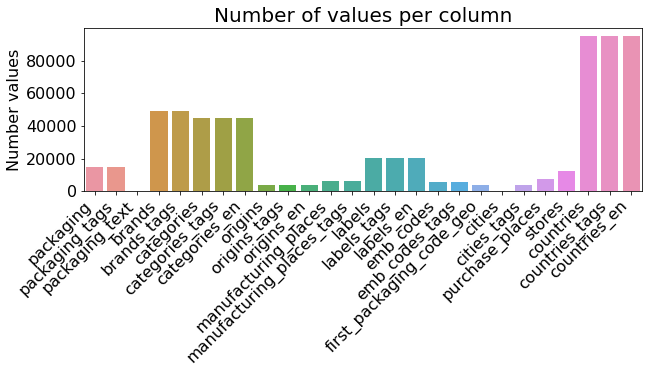

In [38]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=tags.columns, y=tags.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

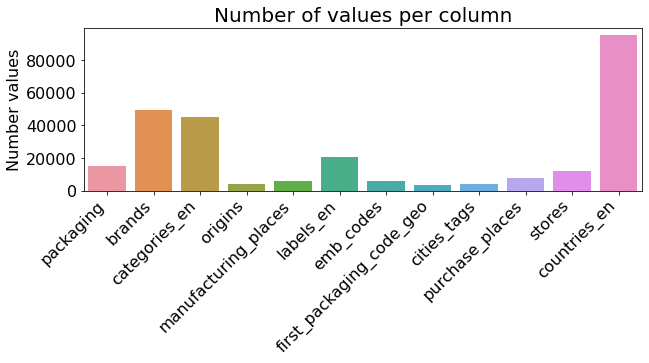

In [39]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=tags[tags_features].columns, y=tags[tags_features].apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

## Ingredients

In [40]:
ingredients = data.loc[:, "ingredients_text":"traces_tags"]

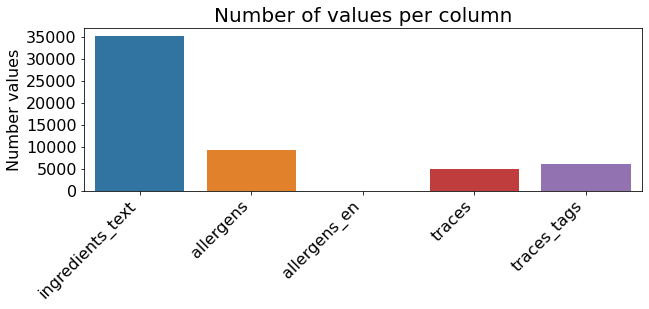

In [41]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=ingredients.columns, y=ingredients.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [42]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 44669 to 1903254
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ingredients_text  35347 non-null  object 
 1   allergens         9345 non-null   object 
 2   allergens_en      0 non-null      float64
 3   traces            4955 non-null   object 
 4   traces_tags       6149 non-null   object 
dtypes: float64(1), object(4)
memory usage: 4.4+ MB


In [43]:
ingredients.head()

,ingredients_text,allergens,allergens_en,traces,traces_tags
44669,"Salt, garlic, black pepper, tricalcium phospha...",NaN,NaN,NaN,NaN
7126,"ingedients: water, canola ol distilled vine sa...",NaN,NaN,NaN,NaN
44905,"Pasteurized grade a whole cow's milk, salt, en...",NaN,NaN,NaN,NaN
6473,NaN,NaN,NaN,NaN,NaN
40355,"Bleached enriched wheat flour (flour, malted b...",NaN,NaN,NaN,NaN


### Empty features

"allergens_en" is completely empty.

### Redundancy

traces, traces_tags

In [44]:
ingredients.loc[:, ["traces", "traces_tags"]].loc[ingredients.traces.notna() & ingredients.traces_tags.notna()].iloc[:20]

,traces,traces_tags
65608,"en:fish,en:gluten,en:milk,en:soybeans","en:fish,en:gluten,en:milk,en:soybeans"
27173,"en:eggs,en:nuts,en:peanuts","en:eggs,en:nuts,en:peanuts"
51862,en:mustard,en:mustard
65423,en:milk,en:milk
53452,"en:eggs,en:nuts,fr:Coconut","en:eggs,en:milk,en:nuts,fr:coconut"
63646,"en:eggs,en:gluten,en:soybeans","en:eggs,en:gluten,en:soybeans"
91259,"en:gluten,en:nuts","en:gluten,en:nuts"
2964,"en:eggs,en:milk,en:nuts,en:peanuts,en:soybeans...","en:eggs,en:milk,en:nuts,en:peanuts,en:soybeans..."
431,en:eggs,en:eggs
90482,"en:nuts,en:soybeans","en:nuts,en:soybeans"


There is, at first sight, no better feature. We will keep "traces"

In [45]:
ingredients_features = [
    "ingredients_text",
    "allergens",
    "traces"
]

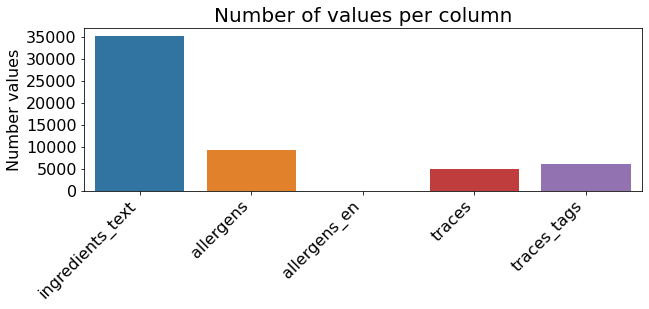

In [46]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=ingredients.columns, y=ingredients.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

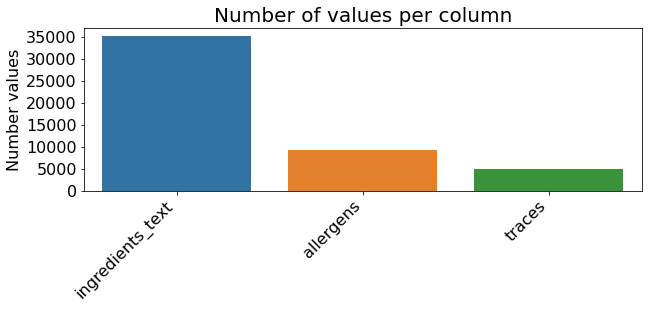

In [47]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=ingredients[ingredients_features].columns, y=ingredients[ingredients_features].apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

## Misc datas

In [48]:
misc = data.loc[:,"serving_size":"image_nutrition_small_url"]

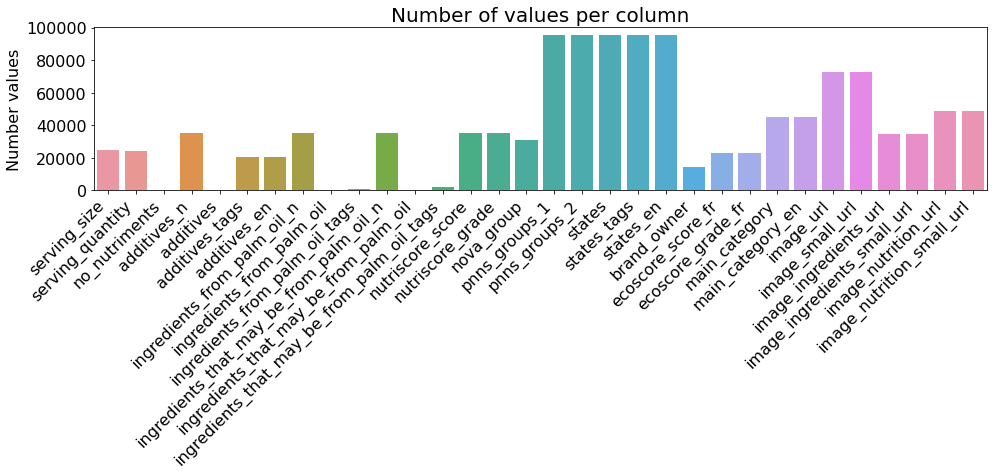

In [49]:
plt.figure(figsize=(16,3))

barplot = sns.barplot(x=misc.columns, y=misc.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [61]:
misc.iloc[:, :16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 44669 to 1903254
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   serving_size                                24513 non-null  object 
 1   serving_quantity                            24311 non-null  float64
 2   no_nutriments                               0 non-null      float64
 3   additives_n                                 35347 non-null  float64
 4   additives                                   0 non-null      float64
 5   additives_tags                              20325 non-null  object 
 6   additives_en                                20325 non-null  object 
 7   ingredients_from_palm_oil_n                 35347 non-null  float64
 8   ingredients_from_palm_oil                   0 non-null      float64
 9   ingredients_from_palm_oil_tags              711 non-null    object 
 10  ingr

In [62]:
misc.iloc[:, 16:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 44669 to 1903254
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pnns_groups_1                95347 non-null  object 
 1   pnns_groups_2                95347 non-null  object 
 2   states                       95365 non-null  object 
 3   states_tags                  95365 non-null  object 
 4   states_en                    95365 non-null  object 
 5   brand_owner                  14430 non-null  object 
 6   ecoscore_score_fr            22970 non-null  float64
 7   ecoscore_grade_fr            22970 non-null  object 
 8   main_category                45061 non-null  object 
 9   main_category_en             45061 non-null  object 
 10  image_url                    72641 non-null  object 
 11  image_small_url              72641 non-null  object 
 12  image_ingredients_url        34841 non-null  object 
 13  image_ingr

In [64]:
misc.head(1)

,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
44669,0.25 tsp (1.2 g),1.2,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3.0,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-uploaded","To be completed,Nutrition facts completed,Ingredients completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories completed,Brands to be completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be uploaded","McCormick & Company, Inc.",NaN,NaN,en:condiments,Condiments,NaN,NaN,NaN,NaN,NaN,NaN


### Empty features

These features are competely empty and then will be no needed:
- no_nutriments
- additives
- ingredients_from_palm_oil
- ingredients_that_may_be_from_palm_oil

These features are almost empty, we will get rid of them too:
- ingredients_from_palm_oil_tags
- ingredients_that_may_be_from_palm_oil_tags

### Redundancy

serving_siez, serving_quantity

In [66]:
misc.loc[:, ["serving_size", "serving_quantity"]].iloc[:20]

,serving_size,serving_quantity
44669,0.25 tsp (1.2 g),1.2
7126,NaN,NaN
44905,1 ONZ (28 g),28.0
6473,NaN,NaN
40355,48 g (4 HOLES),48.0
76136,NaN,NaN
37251,2/3 cup (91 g),91.0
80680,1 SANDWICH (162 g),162.0
1887,NaN,NaN
61056,NaN,NaN


It appears that the feature "serving_size" is non homogeneous in term of units. The feature "serving_quantity" on the other hand, seems to be only in the same unit (g).
We will keep "serving_quantity"

additives_tags, additives_en

In [71]:
misc.loc[:, ["additives_n", "additives_tags", "additives_en"]].iloc[:10]

,additives_n,additives_tags,additives_en
44669,0.0,NaN,NaN
7126,0.0,NaN,NaN
44905,0.0,NaN,NaN
6473,NaN,NaN,NaN
40355,2.0,"en:e450,en:e450i,en:e500,en:e500ii","E450 - Diphosphates,E450i - Disodium diphosphate,E500 - Sodium carbonates,E500ii - Sodium hydrogen carbonate"
76136,NaN,NaN,NaN
37251,3.0,"en:e410,en:e412,en:e417","E410 - Locust bean gum,E412 - Guar gum,E417 - Tara gum"
80680,7.0,"en:e282,en:e341,en:e341i,en:e401,en:e415,en:e450,en:e450i,en:e510,en:e930","E282 - Calcium propionate,E341 - Calcium phosphates,E341i - Monocalcium phosphate,E401 - Sodium alginate,E415 - Xanthan gum,E450 - Diphosphates,E450i - Disodium diphosphate,E510 - Ammonium chloride,E930 - Calcium peroxide"
1887,NaN,NaN,NaN
61056,NaN,NaN,NaN


The feature "additives_en" contains more informations and seems to be easier to parse compare to "additives_tags". Regarding "additives_n" it's the number of additives, there is no direct redundancy for that feature, we can keep it.
We will keep "additives_en" and "additives_n".

In [67]:
misc_features = [
    "serving_quantity",
    "additives_n",
    "additives_en"
]

## Nutrition facts

***
# Nutriscore

## Nutriscore feature analysis

In [52]:
nutriscore_features = [
    "fruits-vegetables-nuts_100g",
    "proteins_100g",
    "fiber_100g",
    "sugars_100g",
    "salt_100g",
    "saturated-fat_100g",
    "energy-kcal_100g"
]

In [53]:
nutriscore_data = data.loc[:, ["nutriscore_score", "nutriscore_grade", "nutrition-score-fr_100g"]]
nutriscore_data.head(10)

,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g
44669,NaN,NaN,NaN
7126,NaN,NaN,NaN
44905,16.0,d,16.0
6473,NaN,NaN,NaN
40355,NaN,NaN,NaN
76136,NaN,NaN,NaN
37251,11.0,d,11.0
80680,3.0,c,3.0
1887,NaN,NaN,NaN
61056,NaN,NaN,NaN


In [54]:
na = nutriscore_data.any(axis="columns")
print("at least one value: ", na.sum())
print("nutriscore_grade recorded: ", data.nutriscore_grade.notna().sum())
print("all rows: ", na.count())

at least one value:  34956
nutriscore_grade recorded:  34956
all rows:  95365


We can see that these threee features "nutriscore_score", "nutriscore_grade" and "nutrition-fr_100G" are redundant. Each time there is at least one of them recorded, the two others are also filled.

We can then get ride of "nutrition-fr_100g" and keep the two others.

In [55]:
features += ["nutriscore_score", "nutriscore_grade"]

Too few entries have nutriscore cell filled, around 33%.
Could be a way to calculate it manually from other fields ?

## Nutriscore needed data

Is there a way to calculate Nutriscore from the others information ?

For that, we need to have the P and N ingredients of the nutriscore formula.

P (positive) ingredients:
- fruits, vegetable, nuts
- proteins
- fiber

N (negative) ingredients:
- sugar
- salt
- saturated fatty acid
- energy (kcal)

In [56]:
p = [
    "fruit",
    "vegetable",
    "nuts",
    "olive",
    "fiber"
]

In [57]:
n = [
    "sugar",
    "sodium",
    "saturated fatr"
]

## Search for needed fields/features

In [58]:
results = []
for ingredient in p + n:
    for column in data.columns:
        if ingredient in column:
            results.append(column)
print(len(results))
results

14


['fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'fiber_100g',
 '-soluble-fiber_100g',
 '-insoluble-fiber_100g',
 'sugars_100g',
 'sodium_100g']

## Nutriscore's features content analysis

They are the fields needed for the nutriscore formulas, but:
- "fruits-vegetables-nuts_100g": completely empty
- "fiber": too fews records, but could simply be due to the fact not all product contains fiber

## Where are the fruits, vegetables and nuts ?

In [59]:
pd.set_option('display.max_colwidth', None)

ingredient_text_data = data[data.ingredients_text.notna()].ingredients_text
ingredient_text_data.head(5)

44669                                                                                                                                                                    Salt, garlic, black pepper, tricalcium phosphate (to make free flowing), oregano, and turmeric.
7126                                            ingedients: water, canola ol distilled vine salt, corn starch lessthan 2% of dried garlic, dried onion acacia gum xa c.ycol alginate, spices, dried bell pepper gro musťard, yeast extract an gum, cane sugar, propilene
44905                                                                                                                                                                                                   Pasteurized grade a whole cow's milk, salt, enzymes and culture.
40355    Bleached enriched wheat flour (flour, malted barley flour, niacin, reduced iron, thiamine mononitrate, riboflavin, folic acid), sugar, water, palm oil, soybean oil, dextrose, soy flour, egg yolks,

In [60]:
def search(row, col: str, match: list):
    for m in match:
        if m in row[col]:
            print("row[col]: ", row[col])
            # return row[col].index

data[data.ingredients_text.notna()].iloc[:10].apply(lambda row: search(row, "ingredients_text", p), axis=1)

row[col]:  Cornmeal bun (enriched flour [wheat flour, malted barley flour, niacin, reduced iron, thiamine mononitrate, riboflavin, folic acid], water, sugar, soybean oil, contains less than 2% of the following: yeast, wheat starch, corn meal, salt, wheat gluten, calcium propionate [preservative], calcium sulfate, enzymes, tricalcium phosphate, ammonium chloride, calcium peroxide, sodium bicarbonate)), breaded chicken breast patty with buffalo style sauce (chicken breast with rib meat, water, sodium phosphates, salt. battered with: water, enriched flour [wheat flour, niacin, reduced iron, thiamine mononitrate, riboflavin, folic acid], yellow corn flour, wheat gluten, salt, leavening [sodium acid pyrophosphate, sodium bicarbonate], sodium alginate, xanthan gum, garlic powder, spices, mustard, whey, breaded with: enriched bleached flour (wheat flour, niacin, reduced iron, thiamine mononitrate, riboflavin, folic acid), salt, dextrose, leavening [sodium acid pyrophosphate, sodium bicarbonat

44669    None
7126     None
44905    None
40355    None
37251    None
80680    None
64164    None
44591    None
65627    None
72546    None
dtype: object

Even if we succed to demonstrate the concentration in fruits/evetables/nuts of certain products, we still can't calculate the nutriscore because we don't have the proportion of those elements per 100g.

### Conclusion
There is now way to calculate the nutriscore.